## Letter Chunk Model: LDA

## Resources

In [1]:
import pickle
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

In [2]:
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize = 3000,
                                           passes=20,
                                           iterations=400,
                                           alpha='auto',
                                           eta='auto',
                                           eval_every = None,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [4]:
# Get it back
with open("20240405_PhD_LtrChkLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [5]:
len(data_lemmatizedNouns[0])

31

In [6]:
# Get it back
with open("20240405_PhD_LtrChkLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

In [7]:
len(data_lemmatized[0])

50

## LDA Model (Nouns Only)

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [14]:
# View
#print(corpus[:1])

In [15]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6778 unique tokens: ['annoyance', 'anxiety', 'catechism', 'child', 'class']...)


In [16]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [17]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

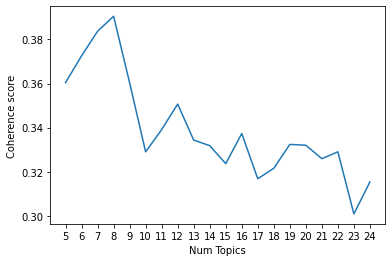

In [18]:
# Show graph
start = 5
limit = 25
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

In [19]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3604
Num Topics = 6 Coherence:  0.3726
Num Topics = 7 Coherence:  0.3837
Num Topics = 8 Coherence:  0.3905
Num Topics = 9 Coherence:  0.3603
Num Topics = 10 Coherence:  0.329
Num Topics = 11 Coherence:  0.3391
Num Topics = 12 Coherence:  0.3507
Num Topics = 13 Coherence:  0.3344
Num Topics = 14 Coherence:  0.3318
Num Topics = 15 Coherence:  0.3237
Num Topics = 16 Coherence:  0.3373
Num Topics = 17 Coherence:  0.3168
Num Topics = 18 Coherence:  0.3215
Num Topics = 19 Coherence:  0.3324
Num Topics = 20 Coherence:  0.332
Num Topics = 21 Coherence:  0.3259
Num Topics = 22 Coherence:  0.329
Num Topics = 23 Coherence:  0.3008
Num Topics = 24 Coherence:  0.3153


In [20]:
print("Coherence score for 8-topic model", coherence_values[3], "\n")

# View the topics
GensimLDA_08 = model_list[3]
pprint(sorted(GensimLDA_08.print_topics(num_words=10)))

Coherence score for 8-topic model 0.3905422346314199 

[(0,
  '0.019*"work" + 0.015*"book" + 0.015*"year" + 0.014*"life" + 0.011*"letter" '
  '+ 0.009*"copy" + 0.007*"time" + 0.007*"man" + 0.007*"day" + 0.007*"place"'),
 (1,
  '0.018*"school" + 0.015*"time" + 0.011*"man" + 0.010*"day" + 0.009*"work" + '
  '0.007*"patient" + 0.007*"hand" + 0.007*"room" + 0.007*"mind" + '
  '0.007*"people"'),
 (2,
  '0.012*"place" + 0.012*"city" + 0.012*"boat" + 0.011*"man" + 0.009*"day" + '
  '0.008*"inhabitant" + 0.008*"people" + 0.007*"village" + 0.007*"water" + '
  '0.006*"country"'),
 (3,
  '0.009*"hand" + 0.008*"body" + 0.008*"friend" + 0.008*"day" + 0.007*"life" + '
  '0.007*"kind" + 0.006*"work" + 0.006*"letter" + 0.006*"water" + '
  '0.006*"paper"'),
 (4,
  '0.013*"work" + 0.011*"room" + 0.011*"time" + 0.010*"dollar" + 0.010*"house" '
  '+ 0.009*"day" + 0.009*"family" + 0.007*"money" + 0.007*"place" + '
  '0.007*"child"'),
 (5,
  '0.023*"day" + 0.021*"child" + 0.016*"week" + 0.015*"letter" + 0.0

In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis08 = pyLDAvis.gensim.prepare(GensimLDA_08, corpus, id2word, sort_topics=False)
vis08

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.097996 -0.088614       1        1   9.861092
1      0.111834  0.081620       2        1  16.333630
2      0.019628  0.150317       3        1   8.119138
3      0.015629 -0.045845       4        1   6.593857
4      0.006649 -0.011815       5        1  10.469563
5      0.026363 -0.074143       6        1  18.843920
6     -0.234932  0.005956       7        1  14.875391
7     -0.043167 -0.017477       8        1  14.903409, topic_info=        Term        Freq       Total Category  logprob  loglift
804     acre  376.000000  376.000000  Default  30.0000  30.0000
16      land  624.000000  624.000000  Default  29.0000  29.0000
2566    farm  338.000000  338.000000  Default  28.0000  28.0000
164   school  442.000000  442.000000  Default  27.0000  27.0000
4349   wheat  162.000000  162.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
155    heart   51.169456  222.910673   Topic8  -5.5604   0.4320
309     foot   48.467537  189.420952   Topic8  -5.6146   0.5405
44      town   53.088711  316.650647   Topic8  -5.5236   0.1177
3      child   54.834440  610.258605   Topic8  -5.4912  -0.5060
107   friend   52.685085  468.646529   Topic8  -5.5312  -0.2819

[652 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6674      3  0.672322  acclivity
5193      8  0.903119       acct
804       7  0.972943       acre
804       8  0.023925       acre
1096      1  0.142378      adobe
...     ...       ...        ...
185       7  0.010634  yesterday
185       8  0.106340  yesterday
3759      1  0.052362       yoke
3759      7  0.890162       yoke
2914      3  0.897838       zahm

[1769 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

## LDA Model Nouns and Verbs

In [23]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [24]:
# View
#print(corpus[:1])

In [25]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(8116 unique tokens: ['annoyance', 'anxiety', 'attend', 'catechism', 'cause']...)


In [26]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

In [27]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

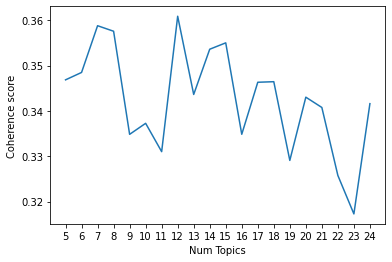

In [28]:
# Show graph
start = 5
limit = 25
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values¿
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

In [29]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3468
Num Topics = 6 Coherence:  0.3485
Num Topics = 7 Coherence:  0.3588
Num Topics = 8 Coherence:  0.3576
Num Topics = 9 Coherence:  0.3348
Num Topics = 10 Coherence:  0.3373
Num Topics = 11 Coherence:  0.331
Num Topics = 12 Coherence:  0.3609
Num Topics = 13 Coherence:  0.3436
Num Topics = 14 Coherence:  0.3536
Num Topics = 15 Coherence:  0.355
Num Topics = 16 Coherence:  0.3348
Num Topics = 17 Coherence:  0.3463
Num Topics = 18 Coherence:  0.3464
Num Topics = 19 Coherence:  0.3291
Num Topics = 20 Coherence:  0.343
Num Topics = 21 Coherence:  0.3408
Num Topics = 22 Coherence:  0.3258
Num Topics = 23 Coherence:  0.3173
Num Topics = 24 Coherence:  0.3416


In [30]:
print("Coherence score for 12-topic model", coherence_values[7], "\n")

# View the topics
GensimLDA_12 = model_list[7]
pprint(sorted(GensimLDA_12.print_topics(num_words=10)))

Coherence score for 12-topic model 0.36086977688991323 

[(0,
  '0.016*"day" + 0.015*"child" + 0.011*"feel" + 0.011*"week" + 0.011*"take" + '
  '0.010*"send" + 0.009*"give" + 0.009*"hear" + 0.008*"time" + 0.008*"come"'),
 (1,
  '0.012*"take" + 0.009*"time" + 0.009*"day" + 0.008*"go" + 0.008*"give" + '
  '0.008*"come" + 0.007*"work" + 0.007*"man" + 0.006*"look" + 0.006*"people"'),
 (2,
  '0.012*"man" + 0.011*"year" + 0.011*"work" + 0.010*"give" + 0.009*"time" + '
  '0.008*"day" + 0.007*"life" + 0.005*"write" + 0.005*"country" + '
  '0.005*"take"'),
 (3,
  '0.011*"man" + 0.011*"time" + 0.009*"give" + 0.009*"send" + 0.008*"take" + '
  '0.007*"day" + 0.007*"work" + 0.006*"hand" + 0.006*"doctor" + 0.006*"know"'),
 (4,
  '0.009*"place" + 0.009*"give" + 0.008*"bring" + 0.007*"boat" + 0.007*"take" '
  '+ 0.007*"time" + 0.006*"hand" + 0.006*"day" + 0.006*"water" + 0.005*"work"'),
 (5,
  '0.016*"come" + 0.016*"school" + 0.013*"take" + 0.009*"room" + 0.009*"day" + '
  '0.009*"time" + 0.009*"give"

In [31]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis12 = pyLDAvis.gensim.prepare(GensimLDA_12, corpus, id2word, sort_topics=False)
vis12

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.092465  0.077253       1        1  13.015832
1      0.067075  0.041842       2        1   6.849135
2      0.046144 -0.094521       3        1   4.109295
3      0.059146 -0.059788       4        1   3.692433
4     -0.005335 -0.016306       5        1   6.451693
5      0.131093 -0.015952       6        1  14.195222
6     -0.085714  0.082452       7        1  15.653078
7     -0.136477  0.026561       8        1   6.179815
8     -0.146187 -0.083390       9        1   5.477785
9      0.007458 -0.100887      10        1   2.198721
10    -0.094804  0.063091      11        1   7.547386
11     0.065136  0.079643      12        1  14.629605, topic_info=         Term        Freq        Total Category  logprob  loglift
1117     acre  388.000000   388.000000  Default  30.0000  30.0000
654   country  786.000000   786.000000  Default  29.0000  29.0000
186      work  961.000000   961.000000  Default  28.0000  28.0000
3307     farm  347.000000   347.000000  Default  27.0000  27.0000
481       man  534.000000   534.000000  Default  26.0000  26.0000
...       ...         ...          ...      ...      ...      ...
139       day  102.118607  1130.933874  Topic12  -5.2592  -0.4825
208      want   78.186333   442.125846  Topic12  -5.5262   0.1896
13       find   78.110139   451.926293  Topic12  -5.5272   0.1667
5       child   78.999474   624.600699  Topic12  -5.5159  -0.1455
150     place   79.804814   824.972162  Topic12  -5.5058  -0.4136

[1001 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6980      8  0.882984      abash
4463      9  0.735328  abolition
762       1  0.208088    account
762       2  0.038332    account
762       3  0.027380    account
...     ...       ...        ...
282       4  0.020665  yesterday
282       6  0.175656  yesterday
282       7  0.010333  yesterday
282      11  0.030998  yesterday
282      12  0.041331  yesterday

[3296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [22]:
GensimLDA_08.save("20240406_PhD_TopicLtrChkLDA08")
pyLDAvis.save_html(vis08, '20240406_PhD_TopicLtrChkLDA08.html')

In [32]:
GensimLDA_12.save("20240406_PhD_TopicLtrChkLDA12")
pyLDAvis.save_html(vis12, '20240406_PhD_TopicLtrChkLDA12.html')